# Exercise 6 : Clusters and Anomalies

### Objective
Let us assume that the houses in our dataset vary by their Living Area (GrLivArea) and Garages (GarageArea) in general.
In this exercise, we will try to find patterns in the data by clustering the house as per their Living Area and Garage Area.
We will also try to identify major anomalies in the dataset, once again, in terms of their Living Area and Garage Area.

### Problem 1 : Clustering using GrLivArea and GarageArea

__a) Extract the two variables in consideration from the dataset
X = pd.DataFrame(houseData[['GrLivArea','GarageArea']])__

In [38]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [39]:
houseData = pd.read_csv('all/train.csv')
houseData.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [40]:
X = pd.DataFrame(houseData[['GrLivArea','GarageArea']])
print(X.shape)
X.head()

(1460, 2)


,GrLivArea,GarageArea
0,1710,548
1,1262,460
2,1786,608
3,1717,642
4,2198,836


__b) Visualize the 2D distribution of the two variables extracted above, using a standard scatter plot__

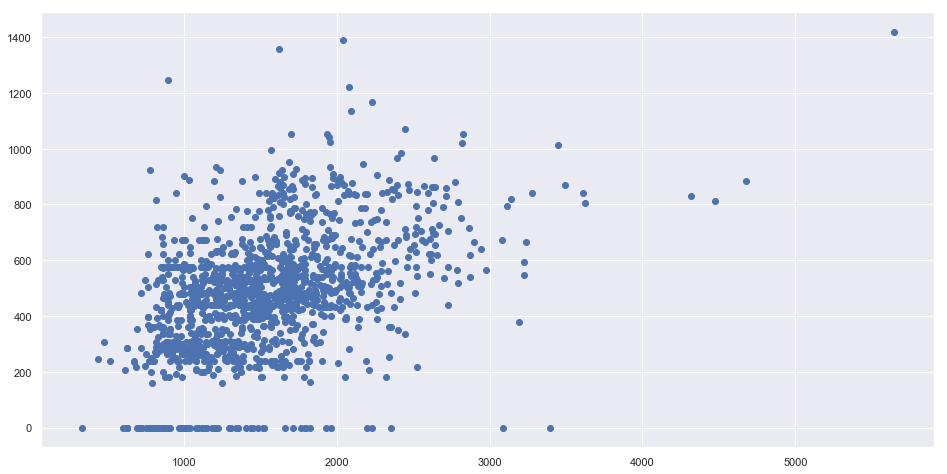

In [41]:
# Plot the Raw Data on a 2D grid
f, axes = plt.subplots(1, 1, figsize=(16,8))
plt.scatter(x = "GrLivArea", y = "GarageArea", data = X)

__c) Import k-Means Clustering model from Scikit-Learn : from sklearn.cluster import KMeans__

__d) Guess the number of clusters from the 2D scatterplot, and perform k-Means clustering with that.__

In [42]:
# Import KMeans from sklearn.cluster
from sklearn.cluster import KMeans

# Guess the Number of Clusters
num_clust = 3


# Create Clustering Model using KMeans
kmeans = KMeans(n_clusters = num_clust)

# Fit the Clustering Model on the Data
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

__e) Print the cluster centers, view their countplot, and visualize the clusters on the 2D scatterplot.__

In [43]:
# Print the Cluster Centers
print("Features", "\tGrLivArea", "\tGarageArea")
print()

for i, center in enumerate(kmeans.cluster_centers_):
    print("Cluster", i, end=":\t")
    for coord in center:
        print(round(coord, 2), end="\t")
    print()

Features 	GrLivArea 	GarageArea

Cluster 0:	1699.11	522.12	
Cluster 1:	1086.74	375.3	
Cluster 2:	2577.98	683.8	


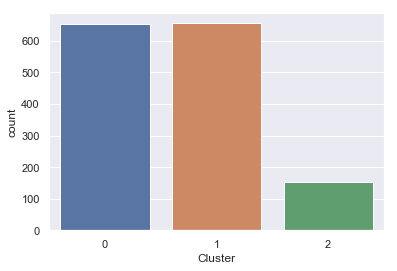

In [44]:
# Predict the Cluster Labels
labels = kmeans.predict(X)

# Append Labels to the Data
X_labeled = X.copy()
X_labeled["Cluster"] = pd.Categorical(labels)

# Summary of the Cluster Labels
sb.countplot(X_labeled["Cluster"])

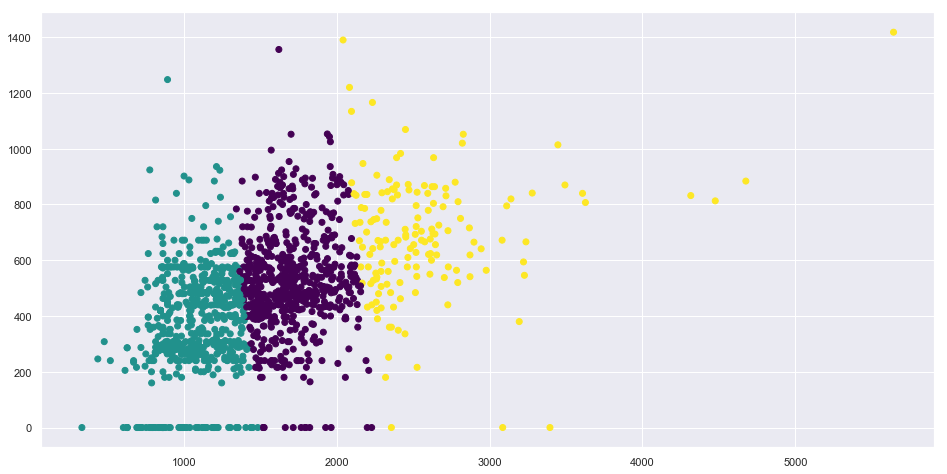

In [45]:
# Visualize the Clusters in the Data
f, axes = plt.subplots(1, 1, figsize=(16,8))
plt.scatter(x = "GrLivArea", y = "GarageArea", c = "Cluster", cmap = 'viridis', data = X_labeled)

In [46]:
# Print the Within Cluster Sum of Squares
print("Within Cluster Sum of Squares :", kmeans.inertia_)

Within Cluster Sum of Squares : 140815707.31475878


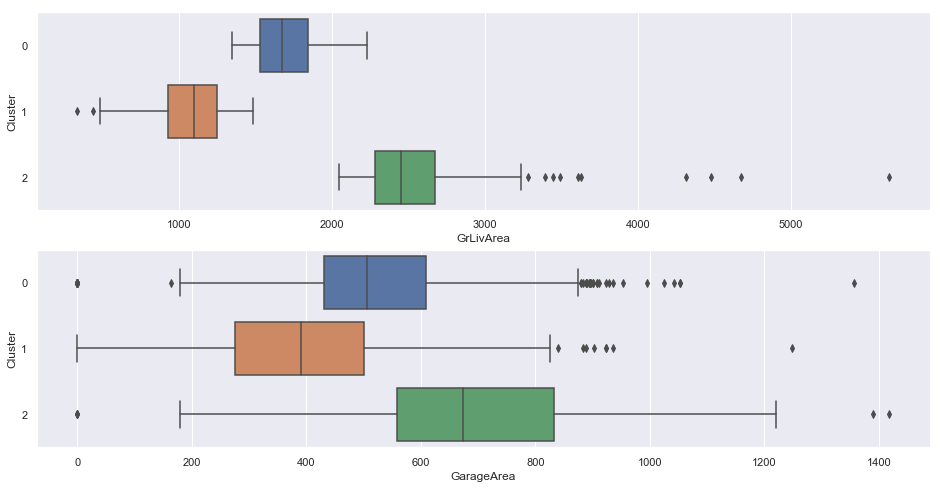

In [47]:
# Boxplots for the Features against the Clusters
f, axes = plt.subplots(2, 1, figsize=(16,8))
sb.boxplot(x = 'GrLivArea', y = 'Cluster', data = X_labeled, ax = axes[0])
sb.boxplot(x = 'GarageArea', y = 'Cluster', data = X_labeled, ax = axes[1])

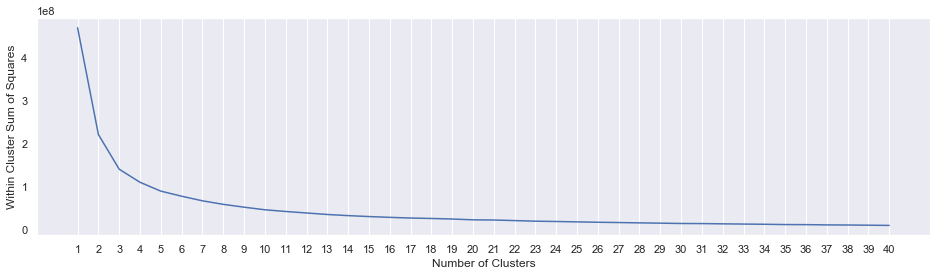

In [48]:
# Import KMeans from sklearn.cluster
from sklearn.cluster import KMeans

# Extract the Features from the Data
X = pd.DataFrame(houseData[["GrLivArea", "GarageArea"]])

# Vary the Number of Clusters
min_clust = 1
max_clust = 40

# Compute Within Cluster Sum of Squares
within_ss = []
for num_clust in range(min_clust, max_clust+1):
    kmeans = KMeans(n_clusters = num_clust)
    kmeans.fit(X)
    within_ss.append(kmeans.inertia_)

# Plot Within SS vs Number of Clusters
f, axes = plt.subplots(1, 1, figsize=(16,4))
plt.plot(range(min_clust, max_clust+1), within_ss)
plt.xlabel('Number of Clusters')
plt.ylabel('Within Cluster Sum of Squares')
plt.xticks(np.arange(min_clust, max_clust+1, 1.0))
plt.grid(which='major', axis='y')
plt.show()

Cluster 0:	2022.35	593.93	
Cluster 1:	1198.24	397.28	

Within Cluster Sum of Squares : 221439215.27648628



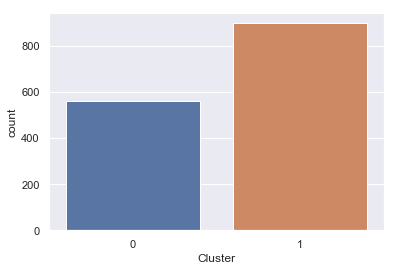

In [58]:
# Set "optimal" Number of Clusters
num_clust = 2

# Create Clustering Model using KMeans
kmeans = KMeans(n_clusters = num_clust)                 

# Fit the Clustering Model on the Data
kmeans.fit(X)

# Print the Cluster Centers
for i, center in enumerate(kmeans.cluster_centers_):
    print("Cluster", i, end=":\t")
    for coord in center:
        print(round(coord, 2), end="\t")
    print()
print()

# Print the Within Cluster Sum of Squares
print("Within Cluster Sum of Squares :", kmeans.inertia_)
print()

# Predict the Cluster Labels
labels = kmeans.predict(X)

# Append Labels to the Data
X_labeled = X.copy()
X_labeled["Cluster"] = pd.Categorical(labels)

# Summary of the Cluster Labels
sb.countplot(X_labeled["Cluster"])

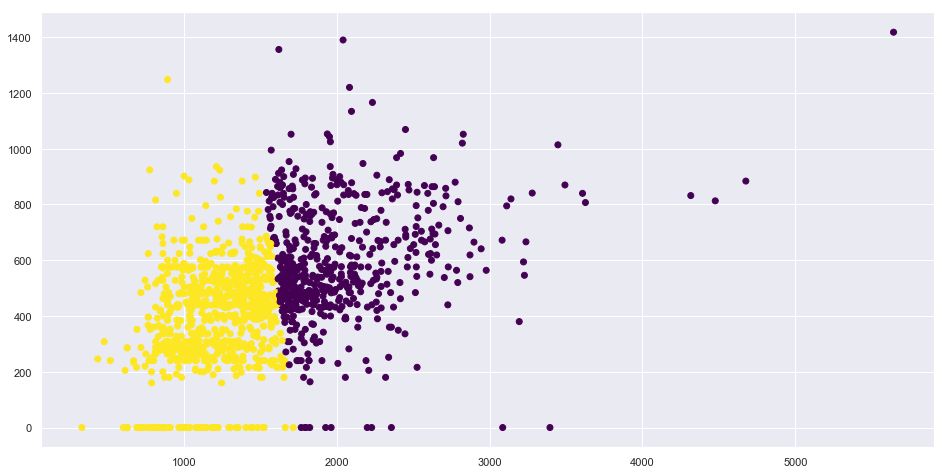

In [59]:
# Visualize the Clusters in the Data
f, axes = plt.subplots(1, 1, figsize=(16,8))
plt.scatter(x = "GrLivArea", y = "GarageArea", c = "Cluster", cmap = 'viridis', data = X_labeled)

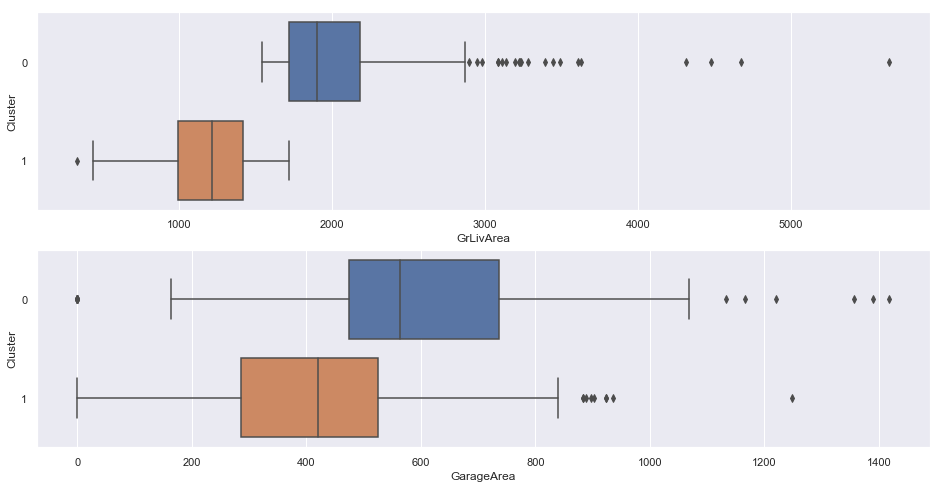

In [60]:
# Boxplots for the Features against the Clusters
f, axes = plt.subplots(2, 1, figsize=(16,8))
sb.boxplot(x = 'GrLivArea', y = 'Cluster', data = X_labeled, ax = axes[0])
sb.boxplot(x = 'GarageArea', y = 'Cluster', data = X_labeled, ax = axes[1])

## Problem 2 : Anomaly Detection with the same Variables

__a) Import Anomaly model from Scikit-Learn : from sklearn.neighbors import LocalOutlierFactor__

__b) Guess the parameters from the 2D scatterplot, and perform Anomaly Detection with those parameters.__

__c) View their countplot of Anomalies vs Normal Data, and visualize the anomalies on the 2D scatterplot.__

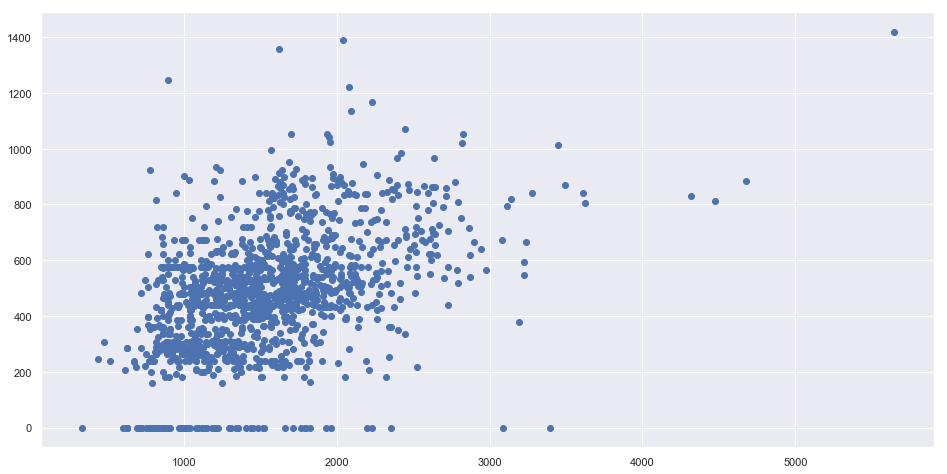

In [64]:
# Extract the Features from the Data
X = pd.DataFrame(houseData[["GrLivArea", "GarageArea"]])

# Plot the Raw Data on a 2D grid
f, axes = plt.subplots(1, 1, figsize=(16,8))
plt.scatter(x = "GrLivArea", y = "GarageArea", data = X)

In [65]:
# Import LocalOutlierFactor from sklearn.neighbors
from sklearn.neighbors import LocalOutlierFactor

# Set the Parameters for Neighborhood
num_neighbors = 20      # Number of Neighbors
cont_fraction = 0.05    # Fraction of Anomalies

# Create Anomaly Detection Model using LocalOutlierFactor
lof = LocalOutlierFactor(n_neighbors = num_neighbors, contamination = cont_fraction)

# Fit the Model on the Data and Predict Anomalies
lof.fit(X)

LocalOutlierFactor(algorithm='auto', contamination=0.05, leaf_size=30,
          metric='minkowski', metric_params=None, n_jobs=None,
          n_neighbors=20, novelty=False, p=2)

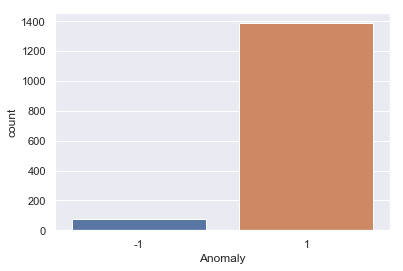

In [66]:
# Predict the Anomalies
labels = lof.fit_predict(X)

# Append Labels to the Data
X_labeled = X.copy()
X_labeled["Anomaly"] = pd.Categorical(labels)

# Summary of the Anomaly Labels
sb.countplot(X_labeled["Anomaly"])

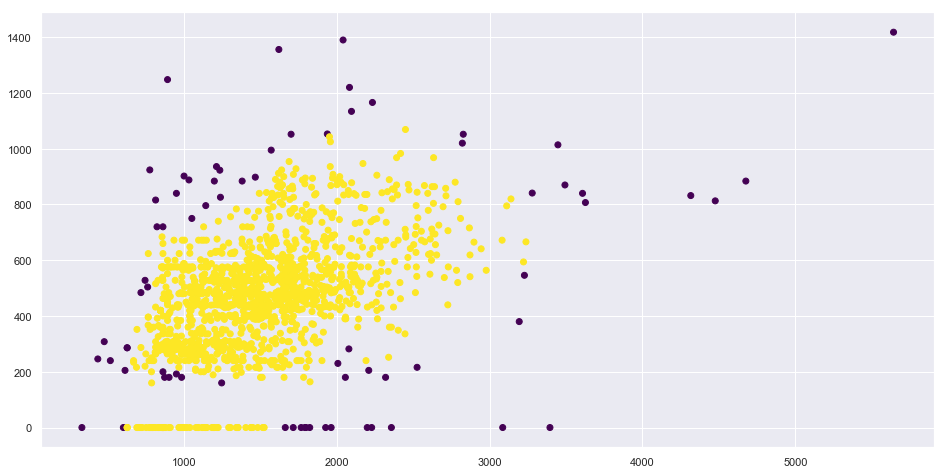

In [68]:
# Visualize the Anomalies in the Data
f, axes = plt.subplots(1, 1, figsize=(16,8))
plt.scatter(x = "GrLivArea", y = "GarageArea", c = "Anomaly", cmap = 'viridis', data = X_labeled)

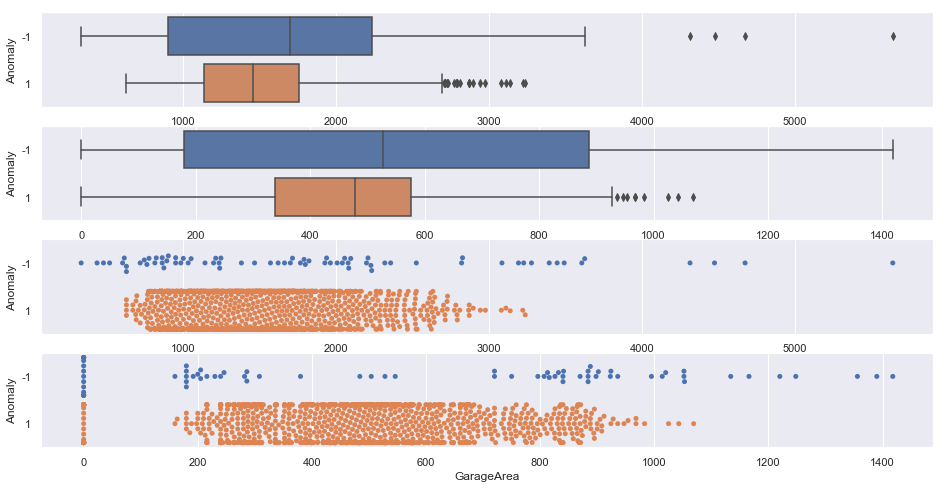

In [71]:
# Boxplots for the Features for the Anomalies
f, axes = plt.subplots(4, 1, figsize=(16,8))
sb.boxplot(x = 'GrLivArea', y = 'Anomaly', data = X_labeled, ax = axes[0])
sb.boxplot(x = 'GarageArea', y = 'Anomaly', data = X_labeled, ax = axes[1])
sb.swarmplot(x = 'GrLivArea', y = 'Anomaly', data = X_labeled, ax = axes[2])
sb.swarmplot(x = 'GarageArea', y = 'Anomaly', data = X_labeled, ax = axes[3])